## План

0. План
1. Организационные вопросы
2. Bird-eye view
3. Производные и градиенты
4. Векторы и матрицы

## 1. Организационные вопросы

* 1 лекция -> 1 семинар
  * По плану 15 штук
* Для сдачи курса нужны баллы 
  * Как получить?
    * 5 домашек x 20 баллов (+ бонусные баллы)
      * 3 ноутбука 
      * 2 соревнования
      * **Дедлайны жесткие**
    * Возможно короткие quiz перед семинарами
  * Сколько надо?
    * Оценка вычисляется как `grade = (18 * points / 100 - 6).round().clip(0, 10)` (см. ниже)
    * Зачет - с тройки
    * Минимум 4 домашки должны быть сданы не меньше, чем на 10 баллов
* За жульничество - санкции (штрафы или того хуже). Жульничать - это, например:
  * Копировать чужой код из ноутбуков (и давать другим)
    * Если брали из open source - указывайте это
  * Использовать чужие submission в соревнованиях
  * Решать за других quiz
  * И все такое
* Связь в Telegram
* Все получится

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(0, 100)

def grade(x):
    return (18 * x / 100 - 6).round().clip(0, 10)

ys = grade(xs)

plt.plot(xs, ys)
plt.grid(True)
plt.xlabel("points")
plt.ylabel("grade")
plt.show()

## 2. Bird-eye view

Модели ML - это параметризованные функции, которые (как правило) в качестве аргумента принимают объекты данных: 
* Векторы признаков, 
* Тензоры изображений / аудио / ..., 
* Последовательности токенов для текстов, ...

Выходы функции интерпретируются как "предсказания" (*predictions*), которые вместе с известными правильными ответами (*ground truth*) используются для корректировки параметров функции в процессе обучения.

![BEV](https://i.ibb.co/jyG18Kx/aim-seminar01-completed-1-2.png)

Для того, чтобы численно оценить, насколько ответы модели соответствуют правде, используются функции потерь (*loss functions*):
* Для регрессии: 
  * Mean Squared Error: $MSE(y, \hat{y}) = ||y - \hat{y}||_2^2$,
  * Mean Absolute Error: $MAE(y, \hat{y}) = |y - \hat{y}|$,
  * ...
* Для классификации:
  * (Binary) Cross Entropy Loss: $BCE(y, \hat{y}) = -y \times \log(\hat{y}) - (1 - y) \times \log(1 - \hat{y})$
  * Hinge Loss, Focal Loss, \<YOUR LOSS\>, ...

Конечная цель процедуры обучения - получить такие значения параметров модели, при которых значение функции потерь минимально.
Иначе говоря, обучение модели ~= оптимизационная задача.

В основном в "промышленном" (иначе говоря - коммерческом, т.е. не-академическом) ML / DL для оптимизации функций потерь используется **метод градиентного спуска** (*gradient descent*) и его вариации.
Другие способы широкого применения по разным причинам не находят - случайный поиск, градиентные методы высшего порядка, и др. **Подумайте, почему?**

В методе градиентного спуска для оптимизации целевой функции (потерь) по параметрам (модели) итеративно вычисляются ее градиенты по этим параметрам, и производится обновление весов в направлении анти-градиента: $$ w_{i+1} = w_i - \eta \nabla _{w} L $$

## 3. Производные и градиенты 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 3.1. Функция одной переменной 

Возьмем простую функцию от одного аргумента:

$$ f(x) = x^2 - 2x + 1 $$

In [3]:
def f(x):
    return x ** 2 - 2 * x + 1

In [4]:
for x in (-1, 0, 4):
    print(f"x = {x:2}, f(x) = {f(x):3}")

x = -1, f(x) =   4
x =  0, f(x) =   1
x =  4, f(x) =   9


(-2.2950000000000004, 4.195000000000006, -0.45, 9.45)

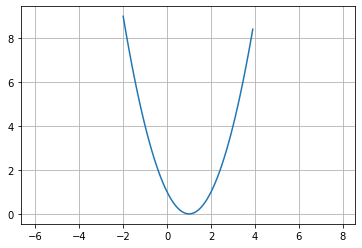

In [5]:
xs = np.arange(-2, 4, step=0.1)

fs = f(xs)

plt.plot(xs, fs)
plt.grid(True)
plt.axis("equal")

Пусть нам требуется, например, найти точки, в которых производная обращается в ноль. Все как в школе:

$$ f(x) = x^2 - 2x + 1 $$
$$ \frac{df}{dx} = f'(x) = 0 $$
$$ f'(x) = 2x - 2 = 2(x - 1) = 0 $$
$$ x = 1 $$

Хотелось бы проверить, что производная в полученной точке действительно равна нулю. Сделаем это численно, а для этого вспомним определение производной:

$$ \frac{df}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x)}{h}} $$

In [7]:
def compute_derivative(func, x, h):
    return (func(x + h) - func(x)) / h

In [8]:
compute_derivative(f, 1, 1e-1)

0.10000000000000009

In [9]:
compute_derivative(f, 1, 1e-6)

1.000088900582341e-06

In [10]:
x = 1
for h in np.logspace(start=0, stop=-10, base=10, num=11):
    print(f"x = {x}, h = {h:6}, f'(x) = {compute_derivative(f, x, h)}")

x = 1, h =    1.0, f'(x) = 1.0
x = 1, h =    0.1, f'(x) = 0.10000000000000009
x = 1, h =   0.01, f'(x) = 0.009999999999998899
x = 1, h =  0.001, f'(x) = 0.0009999999999177334
x = 1, h = 0.0001, f'(x) = 9.99999993922529e-05
x = 1, h =  1e-05, f'(x) = 1.000000082740371e-05
x = 1, h =  1e-06, f'(x) = 1.000088900582341e-06
x = 1, h =  1e-07, f'(x) = 9.992007221626409e-08
x = 1, h =  1e-08, f'(x) = 0.0
x = 1, h =  1e-09, f'(x) = 0.0
x = 1, h =  1e-10, f'(x) = 0.0


Подсчитаем производную в другой точке, например в $x = -1$ :

$$ f'(x=-1) = 2(-1-1) = -4 $$ 

In [11]:
x = -1
for h in np.logspace(start=0, stop=-10, base=10, num=11):
    print(f"x = {x}, h = {h:6}, f'(x) = {compute_derivative(f, x, h)}")

x = -1, h =    1.0, f'(x) = -3.0
x = -1, h =    0.1, f'(x) = -3.899999999999997
x = -1, h =   0.01, f'(x) = -3.990000000000027
x = -1, h =  0.001, f'(x) = -3.9989999999998638
x = -1, h = 0.0001, f'(x) = -3.999900000000167
x = -1, h =  1e-05, f'(x) = -3.999989999980968
x = -1, h =  1e-06, f'(x) = -3.999999000026122
x = -1, h =  1e-07, f'(x) = -3.9999998957540583
x = -1, h =  1e-08, f'(x) = -4.000000020099037
x = -1, h =  1e-09, f'(x) = -3.9999998868722737
x = -1, h =  1e-10, f'(x) = -4.000000330961484


Для численной аппроксимации производной можно использовать [симметричную формулу](http://aco.ifmo.ru/el_books/numerical_methods/lectures/glava1.html), которая может работать лучше в точках, где функция "менее гладкая":
$$ \frac{df}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x-h)}{2h}} $$

In [12]:
def compute_derivative_symmetric(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)    

In [13]:
x = -1
for h in np.logspace(start=0, stop=-10, base=10, num=11):
    print(f"x = {x}, h = {h:6}, f'(x) = {compute_derivative_symmetric(f, x, h)}")

x = -1, h =    1.0, f'(x) = -4.0
x = -1, h =    0.1, f'(x) = -3.999999999999999
x = -1, h =   0.01, f'(x) = -4.0000000000000036
x = -1, h =  0.001, f'(x) = -3.9999999999997815
x = -1, h = 0.0001, f'(x) = -3.9999999999995595
x = -1, h =  1e-05, f'(x) = -4.000000000004
x = -1, h =  1e-06, f'(x) = -3.999999999892978
x = -1, h =  1e-07, f'(x) = -3.9999999978945766
x = -1, h =  1e-08, f'(x) = -3.9999999978945766
x = -1, h =  1e-09, f'(x) = -4.000000108916879
x = -1, h =  1e-10, f'(x) = -4.000000330961484


In [14]:
x = 1
for h in np.logspace(start=0, stop=-10, base=10, num=11):
    print(f"x = {x}, h = {h:6}, f'(x) = {compute_derivative_symmetric(f, x, h)}")

x = 1, h =    1.0, f'(x) = 0.0
x = 1, h =    0.1, f'(x) = 0.0
x = 1, h =   0.01, f'(x) = 0.0
x = 1, h =  0.001, f'(x) = -5.551115123125783e-14
x = 1, h = 0.0001, f'(x) = -5.551115123125783e-13
x = 1, h =  1e-05, f'(x) = 0.0
x = 1, h =  1e-06, f'(x) = 5.551115123125783e-11
x = 1, h =  1e-07, f'(x) = 0.0
x = 1, h =  1e-08, f'(x) = -5.551115123125783e-09
x = 1, h =  1e-09, f'(x) = 0.0
x = 1, h =  1e-10, f'(x) = 0.0


### 3.2. Функция нескольких переменных

Двинемся дальше - рассмотрим функцию от двух переменных:

$$ g(x, y) = 2(x^2 - 2x + 1) + (xy)^2 = 2f(x) + y^2 $$

In [15]:
def g(x, y):
    return 2 * (x ** 2 - 2 * x + 1) + y ** 2

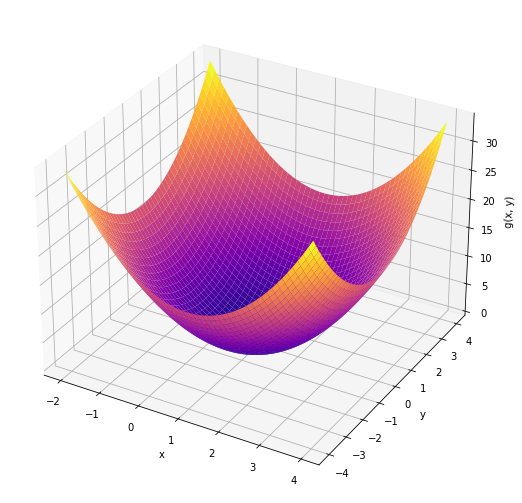

In [16]:
xs = np.arange(-2, 4, step=0.01)
ys = np.arange(-4, 4, step=0.01)
xs, ys = np.meshgrid(xs, ys)

gs = np.asarray([g(x, y) for x, y in zip(xs, ys)])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs, ys, gs, cmap="plasma")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("g(x, y)")
plt.show()

Вспомним, что для функций нескольких переменных существует понятие частной производной (*partial derivative*). Она определяется как производная функции по заданной переменной при условии, что значения остальных переменных "заморожены":

$$ \frac{\partial f(x, y, z)}{\partial y} = f'_y = \lim_{h\rightarrow0}{\frac{f(x, y + h, z) - f(x, y, z)}{h}} $$

Если посчитать все частные производные в точке и собрать из них вектор, получится градиент (*gradient*):

$$ \nabla f(x, y, z) = \{f'_x, f'_y, f'_z\}$$

**NB**: У функций одной переменной частная производная и "обычная" (полная) - это одно и то же, поэтому для них понятие градиента аналогично понятию производной. Вследствие этого в литературе (и жизни) понятия градиента и производных часто смешиваются. Смешивать их придется и нам :point_right: :point_left:

От градиента нам нужно его главное свойство - то, что в каждой точке он указывает направление наибольшего роста функции (доказать это будет *хорошим домашним упражнением*). 


Но ненадолго забудем про градиент и вернемся к частным производным, без которых его не вычислить:

In [17]:
h = 1e-9

x = 1
y = 0
print(f"partial dg/dx (x={x}, y={y}) = {(g(x + h, y) - g(x, y)) / h}") 
print(f"partial dg/dy (x={x}, y={y}) = {(g(x, y + h) - g(x, y)) / h}") 

partial dg/dx (x=1, y=0) = 0.0
partial dg/dy (x=1, y=0) = 1e-09


In [18]:
x = 1
y = 2
print(f"partial dg/dx (x={x}, y={y}) = {(g(x + h, y) - g(x, y)) / h}") 
print(f"partial dg/dy (x={x}, y={y}) = {(g(x, y + h) - g(x, y)) / h}") 

partial dg/dx (x=1, y=2) = 0.0
partial dg/dy (x=1, y=2) = 4.000000330961484


In [19]:
x = -1
y = 0
print(f"partial dg/dx (x={x}, y={y}) = {(g(x + h, y) - g(x, y)) / h}") 
print(f"partial dg/dy (x={x}, y={y}) = {(g(x, y + h) - g(x, y)) / h}") 

partial dg/dx (x=-1, y=0) = -7.999999773744547
partial dg/dy (x=-1, y=0) = 0.0


Посчитаем также частные производные $ g(x, y) $ вручную. Можно рассматривать $ g $ только как функцию от $x, y$:

$$ g(x, y) = 2(x^2 - 2x + 1) + (xy)^2 = 2x^2 - 4x + 2 + x^2y^2 $$ 
$$ \frac{\partial g}{\partial x} = 4x - 4 + 2xy^2 = 2(2x + xy^2 - 2) $$ 
$$ \frac{\partial g}{\partial y} = 2x^2y $$ 

С другой стороны, мы специально ввели функцию $g$ таким образом, чтобы она была выразима через другую функцию, $f$, рассмотренную раньше:
$$ g(x, y) = 2(x^2 - 2x + 1) + x^2y^2 = 2f(x) + x^2y^2 $$

Поэтому взятие производной можно произвести и другим способом, как производную сложной функции:
$$ \frac{\partial g}{\partial x} = \frac{\partial g}{\partial f} \frac{\partial f}{\partial x} + \frac{\partial(x^2y^2)}{\partial x}  $$
$$ \frac{\partial g}{\partial f} = 2 $$
$$ \frac{\partial f}{\partial x} = 2(x - 1) $$
$$ \frac{\partial g}{\partial x} = 2 * 2(x - 1) + 2xy^2 = 2(2x + xy^2 - 2) $$
$$ \frac{\partial g}{\partial y} = 2x^2y $$ 

Результат получился таким же, но действий на первый взгляд пришлось сделать больше. Так зачем усложнять?

Представим, что нам опять принесли новую функцию $u$ и просят продифференцировать ее по всем аргументам: 
$$ u(x, y, z) = 10g(x, y) - 100500z $$ 

Можно подставить выражение для $g(x,y)$, в него подставить выражение для $f(x, y)$, и посчитать все в лоб:
$$ НЕТ $$

Ведь мы же уже знаем частные производные $g$, зачем добру пропадать? В этом случае ощутимо легче продифференцировать $u$ по $g$ и подставить известные значения $g'_{x}$ и $g'_{y}$:

$$ \frac{\partial u}{\partial g} = 10 $$
$$ \frac{\partial u}{\partial x} = \frac{\partial u}{\partial g} \frac{\partial g}{\partial x} = 10 * 2(2x + xy^2 - 2) $$
$$ \frac{\partial u}{\partial y} = \frac{\partial u}{\partial g} \frac{\partial g}{\partial y} = 10 * 2x^2y $$
$$ \frac{\partial u}{\partial z} = -100500 $$

Таким образом, если мы работаем со сложными функциями (причем "сильно вложенными", $f(x) = f_n(f_{n-1}(f_{n-2}(...f_1(x_1, ..., x_m))$), то можно вычислять производные последовательно, переиспользуя уже совершённые вычисления на каждом шаге.

* Мы говорим: **"сложная производная"**
* Они говорят: **"chain rule"**

**Спойлер**: нейронные сети как раз такие.

![resnet](https://www.researchgate.net/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture.png)

(ResNet18)

### 3.3. Вычислительные графы

Добавим еще одну точку зрения на алгебраические выражения. Возьмем такое: $ f(x, y) = 3x - y + 1 $.

Представим, что мы компьютер, и нам нужно вычислить значение этого выражения. Наши действия:
* Взять $x$, умножить на 3
* Взять $y$, умножить на -1
* Сложить предыдущие два результата
* Сложить предыдущий результат с 1

Визуализируем этот алгоритм:

![comp_graph_01](https://i.ibb.co/xCDh23Z/aim-seminar01-compgraphs-5.png)

Получился - :drums: - вычислительный граф:
* Ориентированный
    * Направление ребер соответствует вычислению от входов (аргументов) к выходам (итоговому значению) 
* Узлы соответствуют операциям
    * Входы - переменные (аргументы / параметры), 
    * Выходы - результат вычисления

![comp_graph_01_fwd](https://i.ibb.co/DRqMNNV/aim-seminar01-compgraphs-6.png)
    
По графу можно отследить путь от `конца` (значения выражения) к `началу` (конкретному входному аргументу выражения). Нам это пригодится для того, чтобы вычислять производные всего выражения по промежуточным переменным и параметрам выражения:

![comp_graph_01_bwd](https://i.ibb.co/FzpKH9K/aim-seminar01-compgraphs-7.png)

Еще пример: $ f(x, y) = 3x - xy + 1 $.

![comp_graph_02](https://i.ibb.co/3cV2F9f/aim-seminar01-compgraphs-8.png)

![comp_graph_02_fwd](https://i.ibb.co/7QDzDKr/aim-seminar01-compgraphs-9.png)

![comp_graph_02_bwd](https://i.ibb.co/WPWFtPy/aim-seminar01-compgraphs-10-2.png)


**Важный итог: вычисление `сложных` производных сводится к вычислению `промежуточных` в узлах графа.**


**NB**: Обычно в задачах ML речь идет об оптимизации функции потерь по параметрам модели, а не по входным данным. Т.е. функцию $f(x, y)$, будь она нашей `моделью`, мы бы оптимизировали по ее параметрам $\{w_i\}$: $f(x, y|w_1, w_2, w_3) = w_1x + w_2y + w_3$

*(Бывают и исключения: например, задача Style Transfer, в которой оптимизируется именно входное изображение, т.е. "$x$". Об этом мы поговорим на 10 семинаре курса.)*

![comp_graph_03](https://i.ibb.co/f8yv1Kc/aim-seminar01-compgraphs-11-1.png)

Каверзные вопросы:
* Требуется ли для вычисления $f'_{w_1}$ вычислять $f'_{w_2}$?
* Требуется ли для вычисления $f'_{w_1}$ вычислять $f'_{w_3}$?
* Требуется ли для вычисления $f'_{w_1}$ вычислять $f'_{a}$?
* Требуется ли для вычисления $f'_{x}$ вычислять $f'_{w_2}$?
* Требуется ли для вычисления $f'_{x}$ вычислять $f'_{w_1}$?



Маленький тизер возможностей библиотеки Pytorch:

In [20]:
!pip install torch > /dev/null
!pip install torchviz > /dev/null

In [21]:
from torch.autograd import Variable
from torchviz import make_dot
from torch import Tensor

import torch

In [22]:
def f(x, y, w1, w2, w3):
    return w1 * x + w2 * x * y + w3

In [24]:
# переменные
x  = Variable(Tensor([1]), requires_grad = True)
y  = Variable(Tensor([2]), requires_grad = True)
w1 = Variable(Tensor([3]), requires_grad = False)
w2 = Variable(Tensor([-1]), requires_grad = False)
w3 = Variable(Tensor([1]), requires_grad = False)

out = f(x, y, w1, w2, w3) # прямой проход - вычисление
out.backward() # обратный проход - выч. производных
print(x.grad, y.grad) # производные

tensor([1.]) tensor([-1.])
None


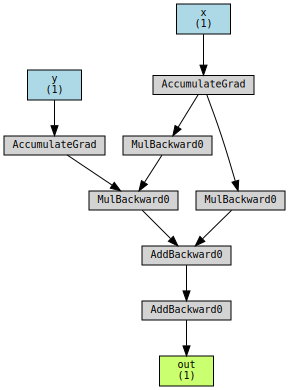

In [25]:
make_dot(out, params={"x": x, "y": y, "w1": w1, "w2": w2, "w3": w3, "out": out})

### 3.4. "Боевой" пример

Пусть нам нужно решить задачу регрессии в плоскости.
Данные имеют следующий вид:

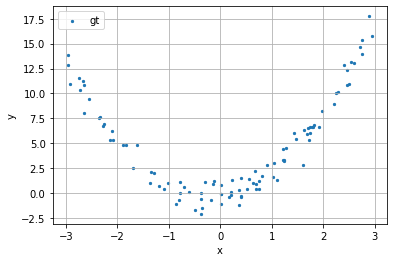

In [26]:
np.random.seed(1234)
_a = np.random.uniform(1, 5)
_b = np.random.uniform(-3, 3)
_c = np.random.uniform(-3, 3)

num_samples = 100

xs = np.random.uniform(-3, 3, size=num_samples)
ys_clean = _a * xs ** 2 + _b * xs + _c
ys_noise = np.random.normal(0, 1, size=len(ys_clean))
ys = ys_clean + ys_noise

plt.scatter(xs, ys, label="gt", s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

Выберем квадратичную модель: $f(x) = ax^2 + bx + c$.
Фактически, нам нужно "угадать" по данным неизвестные параметры `a`, `b` и `c`.
Подбирать их будем итеративно, используя:
  * В качестве алгоритма оптимизации - стохастический градиентный спуск (`SGD`)
    * $ w_{i+1} = w_i - \eta \nabla L _{w} $
  * В качестве функции потерь - среднеквадратичную ошибку `MSE`
    * $ L = ||y - \hat{y}||^2 $

In [29]:
a = 1.   # Initial values
b = 1.   # ...
c = 1.   # ...

def model(x, a, b, c):
    return a * x ** 2 + b * x + c

Построим граф для вычисления нашей модельной функции:

![comp_graph_03](https://i.ibb.co/Jvcvx7Z/aim-seminar01-compgraphs-12.png)

Возьмем 1 точку из датасета:

In [30]:
i = 25
x = xs[i]
y = ys[i]

print(x)  # ~ -1.1
print(y)  # ~ 0.41

-1.0989832669867725
0.41057465680870675


Узнаем, что предсказывает модель в текущем состоянии в этой точке:

![comp_graph_03_fwd](https://i.ibb.co/B3GQmHW/aim-seminar01-completed-10.png)

In [31]:
y_hat = model(x, a, b, c)
print(y_hat)

1.1087809541301472


Дальше по программе нужно запустить вычисление градиентов от конца (`L`) до нужных нам переменных (весов `a`, `b` и `c`). Это и есть **Backpropagation**:

![comp_graph_03_bwd](https://i.ibb.co/9nxNrsh/aim-seminar01-compgraphs-14.png)


In [32]:
a_t = Variable(Tensor([a]), requires_grad=True)
b_t = Variable(Tensor([b]), requires_grad=True)
c_t = Variable(Tensor([c]), requires_grad=True)
y_hat = model(x, a_t, b_t, c_t)
loss = (y - y_hat) ** 2
loss.backward()

print(y, y_hat, loss)
print(a_t.grad)
print(b_t.grad)
print(c_t.grad)


0.41057465680870675 tensor([1.1088], grad_fn=<AddBackward0>) tensor([0.4875], grad_fn=<PowBackward0>)
tensor([1.6865])
tensor([-1.5346])
tensor([1.3964])


Далее обновляем значения весов `a`, `b` и `c` в соответствии с формулой для SGD:

In [ ]:
lr = 0.1   # Learning Rate

In [ ]:
a = a - lr * a_t.grad
b = b - lr * b_t.grad
c = c - lr * c_t.grad
a, b, c

Всю это последовательность шагов нужно повторить для всех объектов обучающей выборке, возможно - не один раз:
  * Вычисление $ \hat{y} $, 
  * Вычисление $ L(y, \hat{y}) $, 
  * Вычисление $ \nabla L_{\{w\}} $
  * Обновление $ \{w\} $


```python
for epoch in num_epochs:
  for (x, y) in zip(xs, ys):
    y_hat = model(x, a, b, c)
    
    loss = (y - y_hat) ** 2
    loss.backward()

    a = a - lr * a.grad
    b = b - lr * b.grad
    c = c - lr * c.grad
```

## 4. Векторы и матрицы

До этого момента мы работали с одномерными примерами - вещественные числа на входе и выходе каждой из операций. Но и в "классическом" ML, и в DL (то бишь Deep Learning) обычно работают с многомерными данными (векторами признаков, тензорами изображений, ...). А это значит, что и операции над ними становятся "многомерными". Поскольку мы хотим использовать BackProp для обучения моделей и с такими операциями тоже, нам нужно уметь считать для них градиенты.



### 4.1. Скалярное произведение

Пусть имеется вектор $ x $: $$ x = [x_1, ..., x_n]^T \in R^n $$
Пусть также имеется вектор параметров $ a $:  $$ a = [a_1, ..., a_n]^T \in R^n $$

Пусть в неком слое выполняется операция скалярного произведения:  $$ f(x, a) = a \bullet x \in R $$

Надо найти градиент этой функции по $ x $.

* Какую размерность будет иметь $ \nabla_{x} f $?
* Как собственно считать?


С размерностями градиентов есть хорошее правило. Поскольку градиент - это набор частных производных, то нам нужно найти частные производные всех выходов по всем входам. Посмотрите, сколько элементов у результата операции (выхода), и сколько элементов у аргумента (входа), по которому надо посчитать градиент. 

У нас:
* На выходе 1 число
* На входе вектор длины $ n $ ($ x $ или $ a $).

Значит, в градиенте должно быть $ n $ чисел, т.е. должен получиться снова вектор.

Осталось его посчитать.

![deriv_dotp](https://i.ibb.co/Prtx4xs/aim-seminar01-compgraphs-11-2.png)


$ \nabla_a f $ посчитайте сами.

### 4.2. Линейный слой

Теперь умножим на наш вектор $ x $ матрицу $ A \in R^{m \times n} $: 
$$ \begin{pmatrix}
a_{11} & ... & a_{1n} \\\ 
...    & ... & ...    \\\ 
a_{m1} & ... & a_{mn}
\end{pmatrix} $$

* Найти градиент $ f(x) = Ax $ по $ x $

Применим снова прием с размерностями. На выходе вектор длины $ m $, на входе вектор длины $ n $. Считать будем частные производные "всех по всем", значит, размерность градиента будет $ m \times n $. Считаем:

![deriv_linear](https://i.ibb.co/kVn77pW/aim-seminar01-compgraphs-14-1.png)


* Найти градиент $ f(x) = Ax $ по $ A $

Вы уже догадались, что будете делать это сами?

Что еще посчитать (по всем входам):

* $ f(x) = \alpha x $ (умножение вектора на скаляр)
* $ f(x) = x^{T}A; $
* $ f(X) = Tr(X) $
* $ f(X) = X^T$
* $ f(X) = AX $ (умножение матрицы на матрицу)


И из нелинейностей:

* $ f(X) = ReLU(X) $
* $ f(x) = \sigma (x) $




Что еще почитать:
* [Хорошая методичка от cs231n](http://cs231n.stanford.edu/vecDerivs.pdf)
* [Конспект от cs231n](https://cs231n.github.io/optimization-2/)
* [Возможно, лучшее в мире объяснение BackProp от A.Karpathy](https://www.youtube.com/watch?v=VMj-3S1tku0)

В следующий раз:
* Библиотека PyTorch
* Автоматическое дифференцирование